# Section 2, Question B

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse
import seaborn as sns
%matplotlib inline

In [7]:
# Read in our data
data = pd.read_csv('homework1_data/bv_data.csv')
X_full = data.x
Y_full = data.y

In [8]:
deg1_err_train_avgs = []
deg2_err_train_avgs = []
deg6_err_train_avgs = []
deg12_err_train_avgs = []

deg1_err_val_avgs = []
deg2_err_val_avgs = []
deg6_err_val_avgs = []
deg12_err_val_avgs = []

for N in range(20, 105, 5):
    # Get the subset of training data to use
    X = X_full[:N]
    Y = Y_full[:N]
    
    # Set up total error variables
    deg1_err_train_total = 0
    deg2_err_train_total = 0
    deg6_err_train_total = 0
    deg12_err_train_fold = []
    
    deg1_err_val_total = 0
    deg2_err_val_total = 0
    deg6_err_val_total = 0
    deg12_err_val_fold = []
    
    
    # Perform 5-fold cross-validation
    kf = KFold(n_splits=5)
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        Y_train, Y_val = Y[train_idx], Y[val_idx]
        
        # Train the models
        deg1_fit = np.polyfit(X_train, Y_train, deg=1)
        deg2_fit = np.polyfit(X_train, Y_train, deg=2)
        deg6_fit = np.polyfit(X_train, Y_train, deg=6)
        deg12_fit = np.polyfit(X_train, Y_train, deg=12)
        
        # Track the avg errors on the training set and validation set
        deg1_err_train_total += mse(Y_train, np.polyval(deg1_fit, X_train))
        deg2_err_train_total += mse(Y_train, np.polyval(deg2_fit, X_train))
        deg6_err_train_total += mse(Y_train, np.polyval(deg6_fit, X_train))
        deg12_err_train_fold.append(mse(Y_train, np.polyval(deg12_fit, X_train)))
        
        deg1_err_val_total += mse(Y_val, np.polyval(deg1_fit, X_val))
        deg2_err_val_total += mse(Y_val, np.polyval(deg2_fit, X_val))
        deg6_err_val_total += mse(Y_val, np.polyval(deg6_fit, X_val))
        deg12_err_val_fold.append(mse(Y_val, np.polyval(deg12_fit, X_val)))
        
    
    # Get average errors across all folds
    deg1_err_train_avgs.append(deg1_err_train_total / 5)
    deg2_err_train_avgs.append(deg2_err_train_total / 5)
    deg6_err_train_avgs.append(deg6_err_train_total / 5)
    deg12_err_train_avgs.append(sum(deg12_err_train_fold) / len(deg12_err_train_fold))
    
    deg1_err_val_avgs.append(deg1_err_val_total / 5)
    deg2_err_val_avgs.append(deg2_err_val_total / 5)
    deg6_err_val_avgs.append(deg6_err_val_total / 5)
    deg12_err_val_avgs.append(sum(deg12_err_val_fold) / len(deg12_err_val_fold))

### Plot learning curves

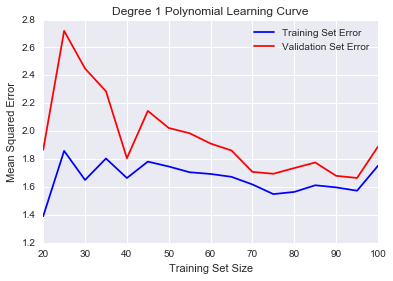

In [9]:
training_size = range(20, 105, 5)
plt.plot(training_size, deg1_err_train_avgs, 'b-', label='Training Set Error')
plt.plot(training_size, deg1_err_val_avgs, 'r-', label='Validation Set Error')
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Degree 1 Polynomial Learning Curve")
plt.legend()
plt.show()

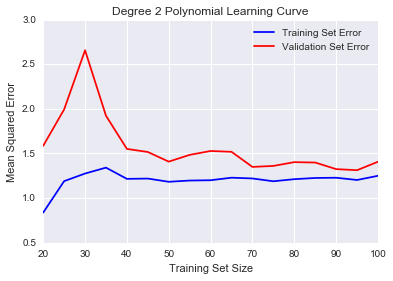

In [10]:
training_size = range(20, 105, 5)
plt.plot(training_size, deg2_err_train_avgs, 'b-', label='Training Set Error')
plt.plot(training_size, deg2_err_val_avgs, 'r-', label='Validation Set Error')
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Degree 2 Polynomial Learning Curve")
plt.legend()
plt.show()

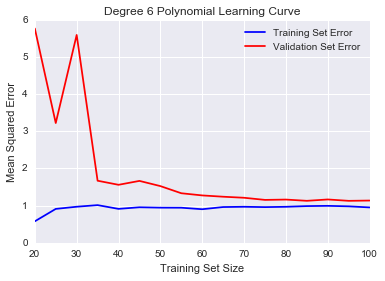

In [11]:
training_size = range(20, 105, 5)
plt.plot(training_size, deg6_err_train_avgs, 'b-', label='Training Set Error')
plt.plot(training_size, deg6_err_val_avgs, 'r-', label='Validation Set Error')
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Degree 6 Polynomial Learning Curve")
plt.legend()
plt.show()

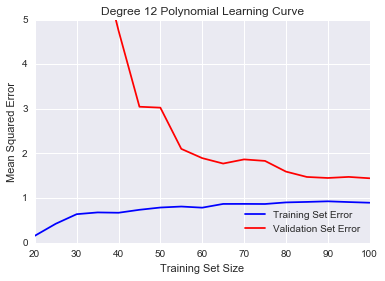

In [12]:
training_size = range(20, 105, 5)
plt.plot(training_size, deg12_err_train_avgs, 'b-', label='Training Set Error')
plt.plot(training_size, deg12_err_val_avgs, 'r-', label='Validation Set Error')
axes = plt.gca()
axes.set_xlim([20,100])
axes.set_ylim([0,5])
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Degree 12 Polynomial Learning Curve")
plt.legend(loc='best')
plt.show()

# Section 4, Questions C through E

### Question C

In [3]:
# Read in our data
data = pd.read_csv("homework1_data/sgd_data.csv")
data['x0'] = 1.0 # Add a bias term
x0, x1, x2, x3, x4, y = data.x0, data.x1, data.x2, data.x3, data.x4, data.y
data = np.dstack([x0, x1, x2, x3, x4, y])[0]
X = np.dstack([x0, x1, x2, x3, x4])[0]
Y = np.array(y)

In [4]:
# Do SGD
step = np.power(np.e, -15)
weights = np.array([0.001, 0.001, 0.001, 0.001, 0.001]) # Note the bias term
thresh = 0.0001
rel_loss_red = 1


##### Run one epoch to get first relative loss

preds = np.dot(X, weights)
initial_loss = np.sum(np.power(Y - preds, 2))

# Shuffle the data
np.random.shuffle(data)

for pt in data:
    x = pt[:-1]
    y = pt[-1]
    update = 2 * step * (np.dot(weights, x) - y) * x
    weights -= update

# Measure the loss
preds = np.dot(X, weights)
loss = np.sum(np.power(Y - preds, 2))

# Compute the relative loss reduction for first epoch
rel_loss_red_ep1 = 1 - loss / initial_loss


##### Now run epochs until relative loss reduction is too low
while rel_loss_red / rel_loss_red_ep1 > thresh:
    # Shuffle the data
    np.random.shuffle(data)
    
    # Go through all data points (1 epoch)
    for pt in data:
        x = pt[:-1]
        y = pt[-1]
        update = 2 * step * (np.dot(weights, x) - y) * x
        weights -= update
        
    # Measure the loss
    preds = np.dot(X, weights)
    new_loss = np.sum(np.power(Y - preds, 2))
    assert(new_loss < loss)
    rel_loss_red = 1 - new_loss / loss
    loss = new_loss

In [82]:
# And the final weights are...
weights

array([ -0.22954377,  -5.99434015,   4.00886047, -11.92727913,   8.97757843])

### Question D

In [135]:
# Do SGD
steps = [np.power(np.e, -10), np.power(np.e, -11), np.power(np.e, -12), 
         np.power(np.e, -13), np.power(np.e, -14), np.power(np.e, -15)]
thresh = 0.0001
all_to_plot = []


for step in steps:
    weights = np.array([0.001, 0.001, 0.001, 0.001, 0.001]) # Note the bias term
    rel_loss_red = 1
    to_plot = []
    epoch_count = 1
    preds = np.dot(X, weights)
    loss = np.sum(np.power(Y - preds, 2))
    to_plot.append(loss)
    ##### Run one epoch to get first relative loss

    preds = np.dot(X, weights)
    initial_loss = np.sum(np.power(Y - preds, 2))

    # Shuffle the data
    np.random.shuffle(data)

    for pt in data:
        x = pt[:-1]
        y = pt[-1]
        update = 2 * step * (np.dot(weights, x) - y) * x
        weights -= update
    epoch_count += 1

    # Measure the loss
    preds = np.dot(X, weights)
    loss = np.sum(np.power(Y - preds, 2))
    
    to_plot.append(loss)

    # Compute the relative loss reduction for first epoch
    rel_loss_red_ep1 = 1 - loss / initial_loss


    ##### Now run epochs until relative loss reduction is too low
    while rel_loss_red / rel_loss_red_ep1 > thresh:
        # Shuffle the data
        np.random.shuffle(data)

        # Go through all data points (1 epoch)
        for pt in data:
            x = pt[:-1]
            y = pt[-1]
            update = 2 * step * (np.dot(weights, x) - y) * x
            weights -= update
        epoch_count += 1

        # Measure the loss
        preds = np.dot(X, weights)
        new_loss = np.sum(np.power(Y - preds, 2))
        to_plot.append(new_loss)
        rel_loss_red = 1 - new_loss / loss
        loss = new_loss
    all_to_plot.append(to_plot)

In [101]:
len(all_to_plot)

6

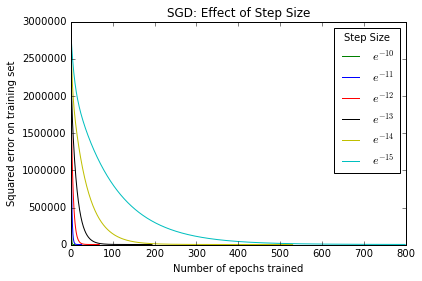

In [117]:
plt.plot(all_to_plot[0], 'g-', label='$e^{-10}$')
plt.plot(all_to_plot[1], 'b-', label='$e^{-11}$')
plt.plot(all_to_plot[2], 'r-', label='$e^{-12}$')
plt.plot(all_to_plot[3], 'k-', label='$e^{-13}$')
plt.plot(all_to_plot[4], 'y-', label='$e^{-14}$') # Only plot the first 400, for scaling issues
plt.plot(all_to_plot[5][:800], 'c-', label='$e^{-15}$') # Only plot the first 400, for scaling issues
plt.xlabel("Number of epochs trained")
plt.ylabel("Squared error on training set")
plt.title("SGD: Effect of Step Size")
plt.legend(title='Step Size')
plt.show()

### Question E

In [175]:
# Compute the two terms separately
mtx = np.zeros((5, 5))
for x in X:
    mtx += np.outer(x, x.T)
    
vec = np.zeros(5)
for i in range(len(X)):
    vec += Y[i] * X[i]

In [179]:
closed_form_weights = np.dot(np.linalg.inv(mtx), vec)

In [180]:
print(closed_form_weights)
print(weights)

[ -0.31644251  -5.99157048   4.01509955 -11.93325972   8.99061096]
[ -0.22955808  -5.99432724   4.00887734 -11.9272628    8.97759234]


So the closed form matches quite closely with the results from SGD!